/tmp/ipython-input-1-4051326151.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0554
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 9.9226e-04
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 4.3014e-04
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 3.7113e-04
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.5321e-04
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.6191e-04
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.3684e-04
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5095e-04
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 3.3593e-04
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.5448e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


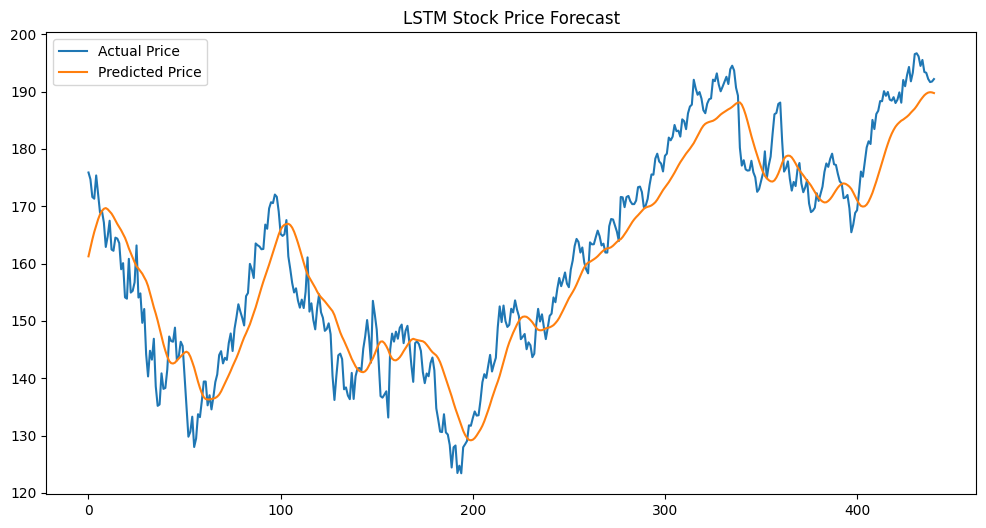

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
data = df[['Close']]

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.legend()
plt.title('LSTM Stock Price Forecast')
plt.show()